####Group Member: NAIQING CAI, YUHANG LAN, ZIHAO LI, XINKAI CHEN

# Abstract

####Our project focuses on the measure of percentage of body fat. In this module, we will come up with a simple, robust, accurate and precise “rule-of-thumb” method to estimate percentage of body fat.

#####Our project can be divided into 4 steps:
1.Data Pre-processing
2.Feature Selection
3.Model Construction & Evaluation
4.Model Diagnosis
5.Application

# Data Pre-processing

## Data Structure 

####First of all, we should get a general idea of what data looks like, and is there some relationship between dataset.

In [57]:
bodyfat_raw <- read.csv("BodyFat.csv")

In [58]:
head(bodyfat_raw)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [2]:
bodyfat <- bodyfat_raw[,-1]
head(bodyfat)

BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [3]:
summary(bodyfat)

    BODYFAT         DENSITY           AGE            WEIGHT     
 Min.   : 0.00   Min.   :0.995   Min.   :22.00   Min.   :118.5  
 1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75   1st Qu.:159.0  
 Median :19.00   Median :1.055   Median :43.00   Median :176.5  
 Mean   :18.94   Mean   :1.056   Mean   :44.88   Mean   :178.9  
 3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00   3rd Qu.:197.0  
 Max.   :45.10   Max.   :1.109   Max.   :81.00   Max.   :363.1  
     HEIGHT        ADIPOSITY          NECK           CHEST       
 Min.   :29.50   Min.   :18.10   Min.   :31.10   Min.   : 79.30  
 1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35  
 Median :70.00   Median :25.05   Median :38.00   Median : 99.65  
 Mean   :70.15   Mean   :25.44   Mean   :37.99   Mean   :100.82  
 3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38  
 Max.   :77.75   Max.   :48.90   Max.   :51.20   Max.   :136.20  
    ABDOMEN            HIP            THIGH            KNEE      
 Min.   : 69.40  

corrplot 0.84 loaded


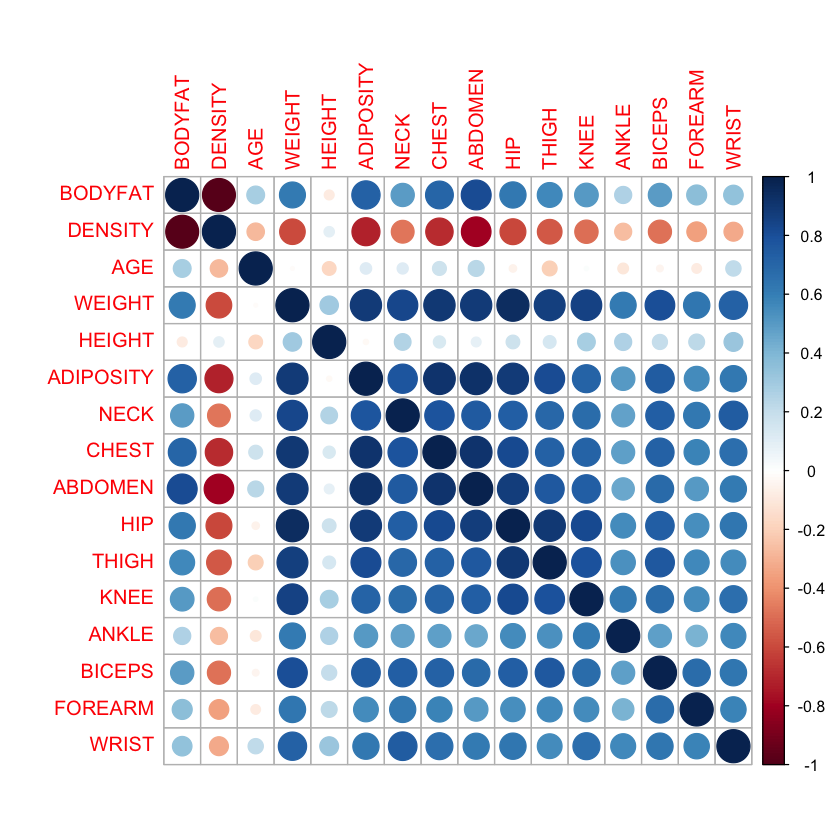

In [4]:
#Check Correlation
library(corrplot)
corrplot(cor(bodyfat), method = "circle")

## Data Cleaning

### Scatterplot

####First, we use scatter plot to check outlier and abnormal samples.

####Here, we draw scatterplot of height and find that the minimum height is abnormal. In this way, we use the formula and other data of this man to recover the height. We can see after replace the abnormal height with the new one, the scatterplot is correct.

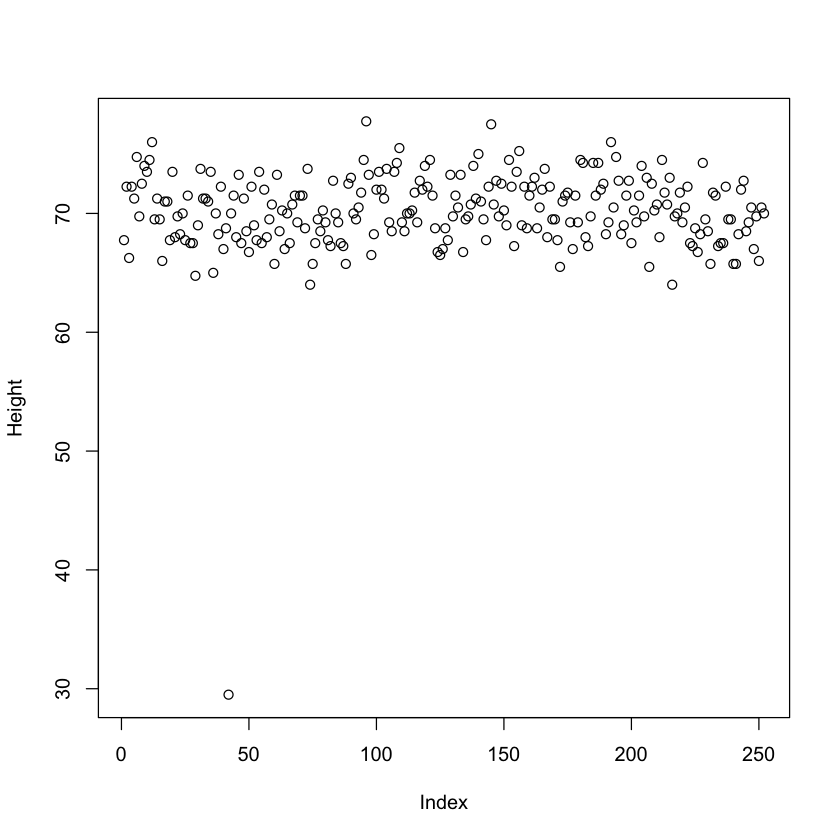

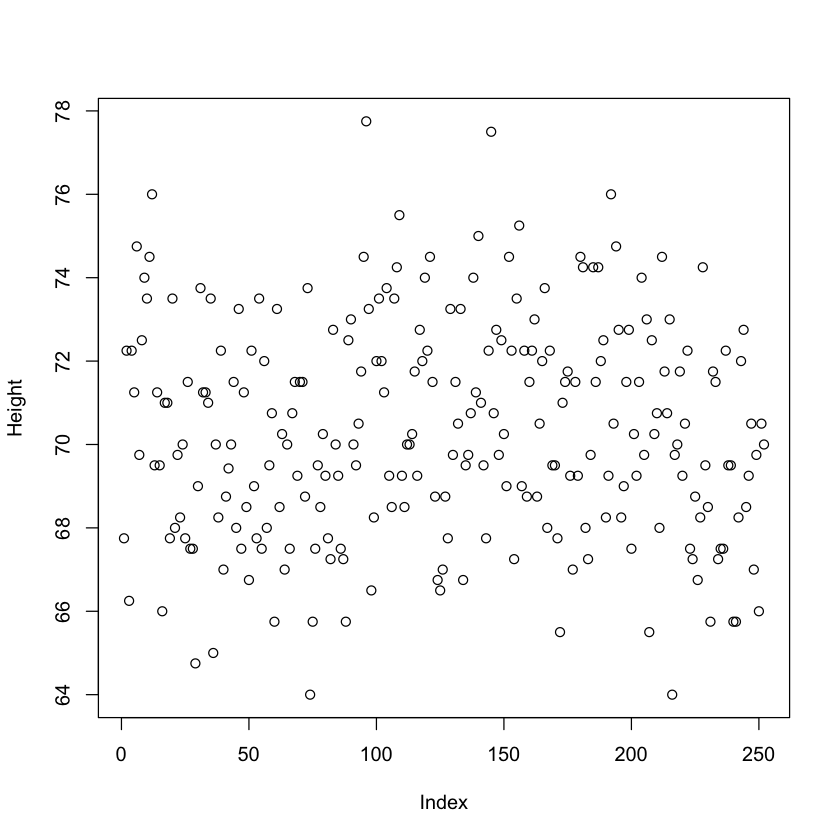

In [5]:
#Scatter Plot of Height
plot(bodyfat[,'HEIGHT'],ylab = 'Height')
d1 = which.min(bodyfat[,'HEIGHT'])
d1_height = sqrt(bodyfat[d1,'WEIGHT']*703/(bodyfat[d1,'ADIPOSITY']))
bodyfat[d1,'HEIGHT'] =  d1_height
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

####Next we draw scatterplot of body fat and find that the 2 minimum body fat is 0, and 1.9, and the maximum is 45.1. It seems that these 3 points are abnormal. 

[1] 0

[1] 45.1

[1] 1.9

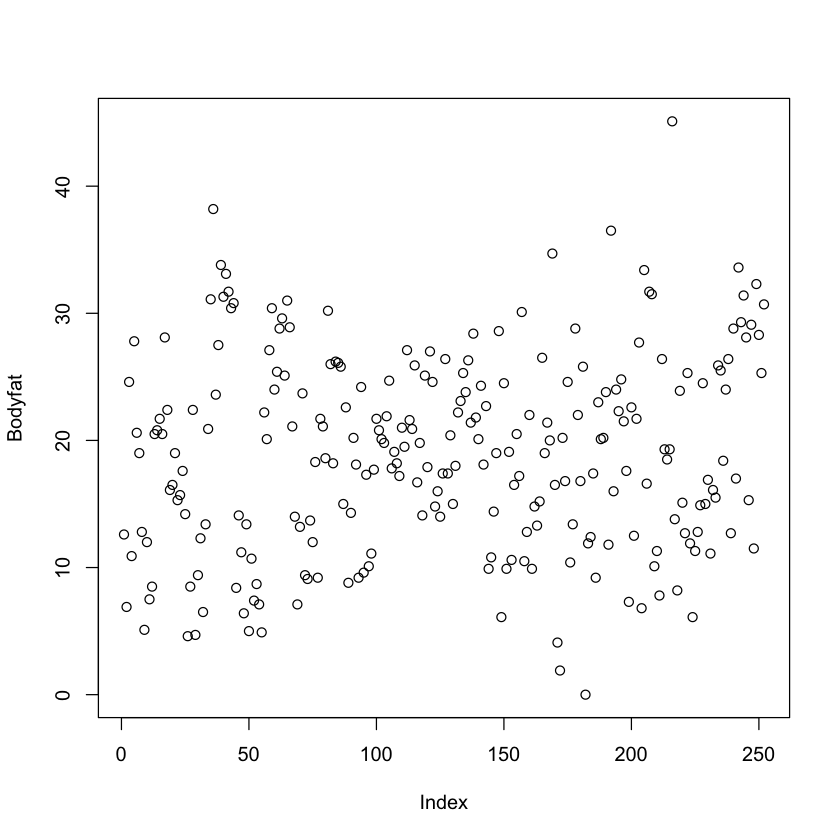

In [6]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')
d2 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=1)[1])
d3 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=nrow(bodyfat))[nrow(bodyfat)])
d4 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=2)[2])
bodyfat[d2,'BODYFAT']
bodyfat[d3,'BODYFAT']
bodyfat[d4,'BODYFAT']

####In this way, we want to recover these body fat by the given formula Bodyfat=495/Density-450. But after we try it, we find that it is impossible to recover, we can just delete them.

In [7]:
d2_bodyfat = (495/bodyfat[d2,'DENSITY']-450)
d2_bodyfat

[1] -3.611687

In [8]:
d3_bodyfat = (495/bodyfat[d3,'DENSITY']-450)
d3_bodyfat

[1] 47.48744

In [9]:
d4_bodyfat = (495/bodyfat[d4,'DENSITY']-450)
d4_bodyfat

[1] 0.696531

####We also draw scatterplot of adiposity and find that the maximum is 48.9. It seems that this one is abnormal. After trying we find it can not be recovered, so we delete it also.

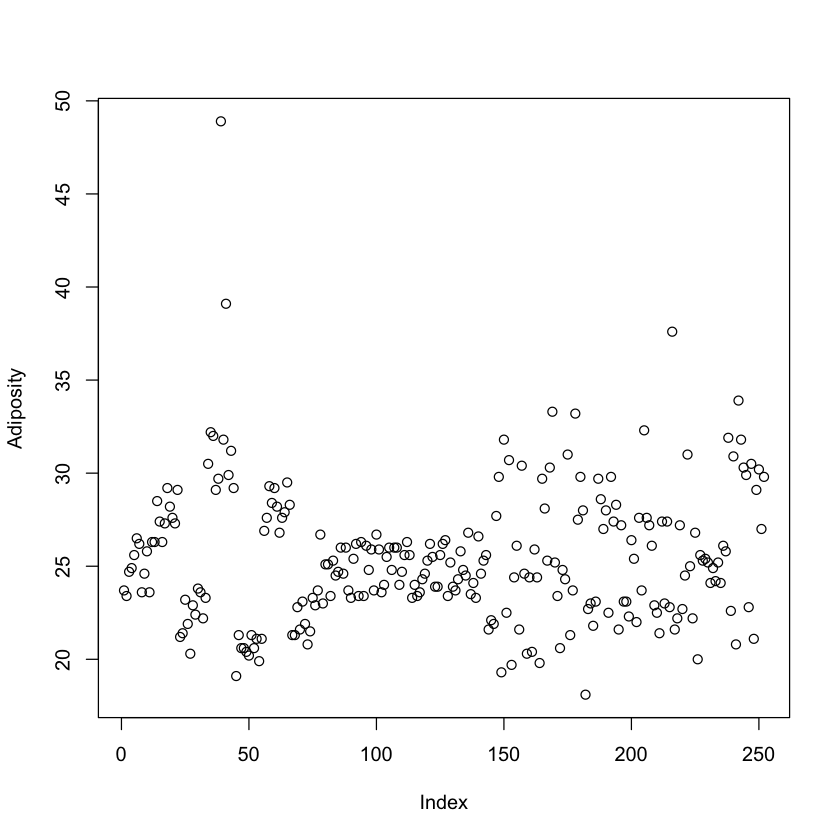

In [10]:
plot(bodyfat[,'ADIPOSITY'],ylab = 'Adiposity')
d5 = which.max(bodyfat[,'ADIPOSITY'])

####In the end, we totally delete 4 point d2, d3, d4, d5 as follows. 
####Beside that, we also delete the density column, because we use bodyfat to be our response variable.

In [11]:
eyeballing_cleanup = c(d2,d3,d4,d5)
bodyfat_1 = bodyfat[-eyeballing_cleanup,-2]

### Leverage

####Next step, we use leverage plot to check whather there are any other outliers.
####In this way, we can easily see from the plot that 86th, 221th are 2 outliers.

In [12]:
summary(model_1 <- lm(BODYFAT ~ ., data=bodyfat_1))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1605  -2.9030  -0.0674   2.7517   9.1590 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.092900  38.395295  -0.081 0.935866    
AGE          0.065022   0.029628   2.195 0.029178 *  
WEIGHT      -0.035873   0.106944  -0.335 0.737595    
HEIGHT      -0.113584   0.534802  -0.212 0.831993    
ADIPOSITY    0.198123   0.774834   0.256 0.798410    
NECK        -0.370133   0.215797  -1.715 0.087639 .  
CHEST       -0.116867   0.104320  -1.120 0.263750    
ABDOMEN      0.815973   0.085624   9.530  < 2e-16 ***
HIP         -0.156620   0.134904  -1.161 0.246842    
THIGH        0.166353   0.137514   1.210 0.227613    
KNEE        -0.007159   0.229068  -0.031 0.975094    
ANKLE        0.149535   0.204750   0.730 0.465922    
BICEPS       0.130081   0.157982   0.823 0.411128    
FOREARM      0.259338   0.192481   1.347 0.179178    
WRIST       -1.65431

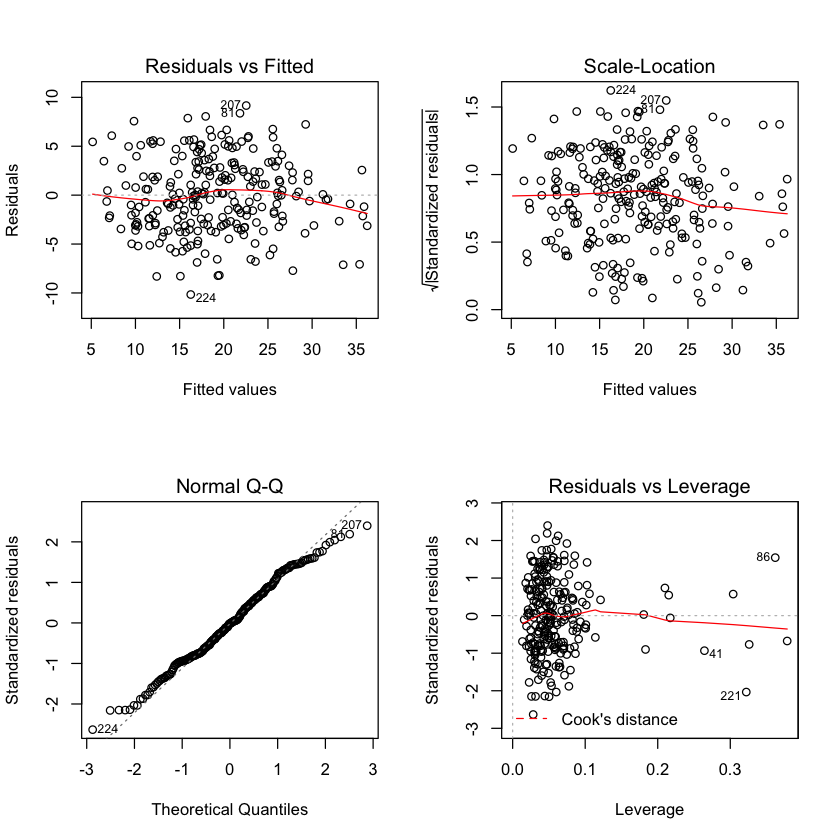

In [13]:
layout(matrix(1:4, ncol=2))
plot(model_1)

### Cooks Distance

####To prove it, we use coks distance to check it again, and this time it also shows 86th, and 221th are 2 outliers. It matches the result of leverage plot. So we can delete these 2 outliers.

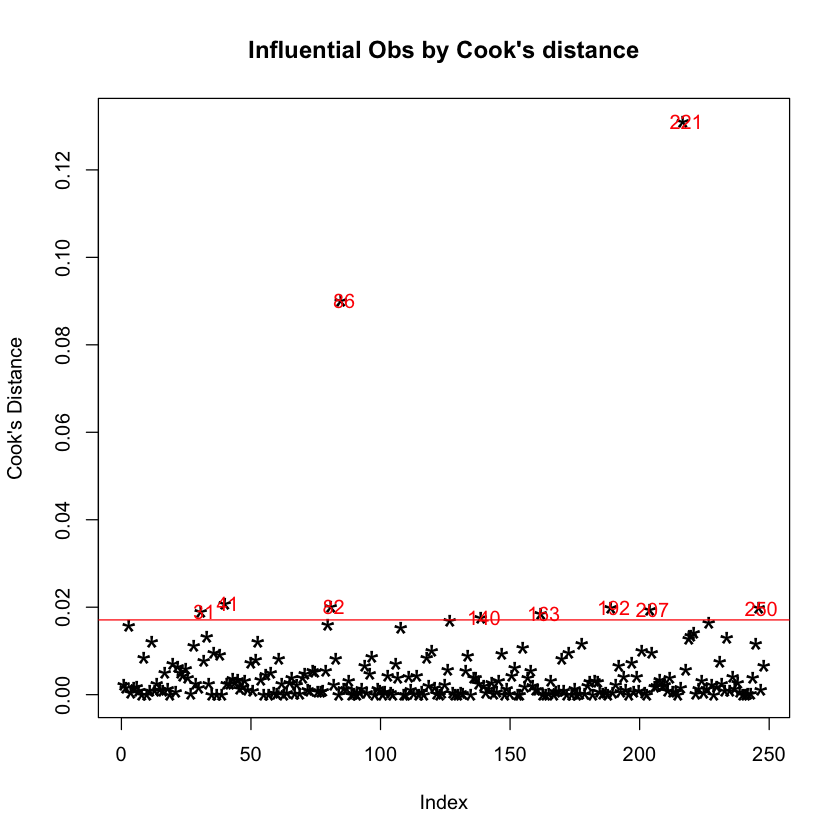

In [14]:
# Plot the Cook's Distance using the traditional 4/(n-p) criterion
cooksd <- cooks.distance(model_1)
sample_size <- nrow(bodyfat_1)
para_size <- ncol(bodyfat_1)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

In [15]:
#influential <- as.numeric(names(cooksd)[(cooksd > (4/(sample_size-para_size)))])
influential <- c(86,221)
bodyfat_2 <- bodyfat[-c(eyeballing_cleanup,influential),-2]
summary(model_2 <- lm(BODYFAT ~ ., data=bodyfat_2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6433 -2.7974 -0.1069  2.6348  8.9325 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -53.30060   45.44215  -1.173  0.24203    
AGE           0.05515    0.02990   1.844  0.06642 .  
WEIGHT       -0.17720    0.12721  -1.393  0.16495    
HEIGHT        0.54173    0.61775   0.877  0.38143    
ADIPOSITY     1.01268    0.86902   1.165  0.24509    
NECK         -0.32802    0.21486  -1.527  0.12820    
CHEST        -0.09944    0.10357  -0.960  0.33798    
ABDOMEN       0.83355    0.08523   9.780  < 2e-16 ***
HIP          -0.16396    0.13373  -1.226  0.22143    
THIGH         0.21225    0.13745   1.544  0.12391    
KNEE          0.03994    0.22871   0.175  0.86153    
ANKLE        -0.04475    0.24829  -0.180  0.85712    
BICEPS        0.11376    0.15721   0.724  0.47003    
FOREARM       0.28971    0.19109   1.516  0.13088    
WRIST        -1.40790    0.495

####After deleting these 2 outliers, we check the model with both leverage and cooks distance again, and we find this time there is no more outliers.

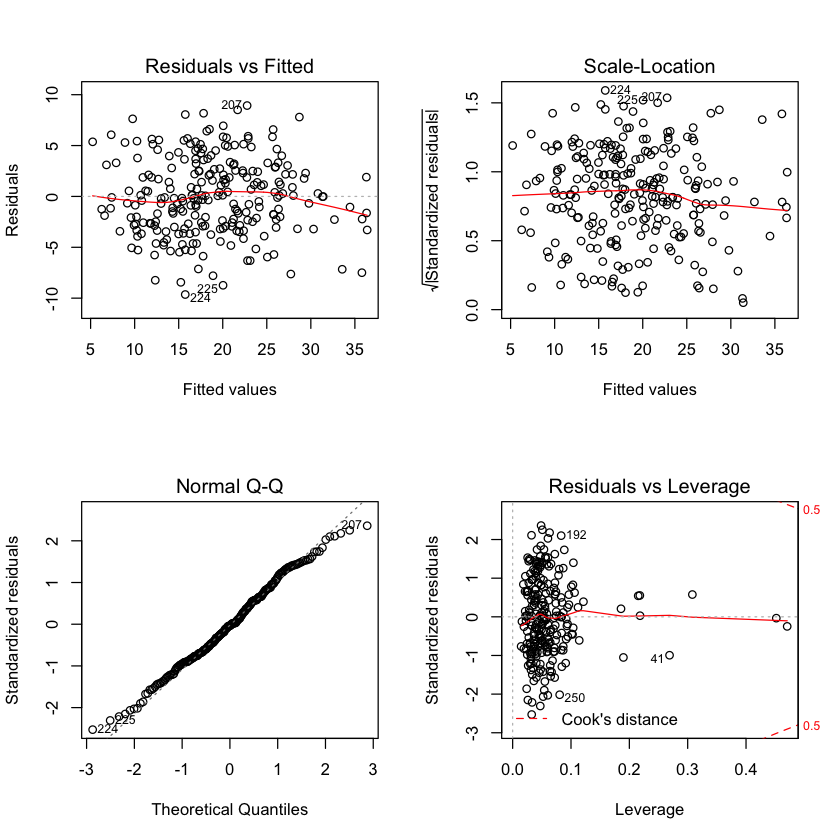

In [16]:
layout(matrix(1:4, ncol=2))
plot(model_2)

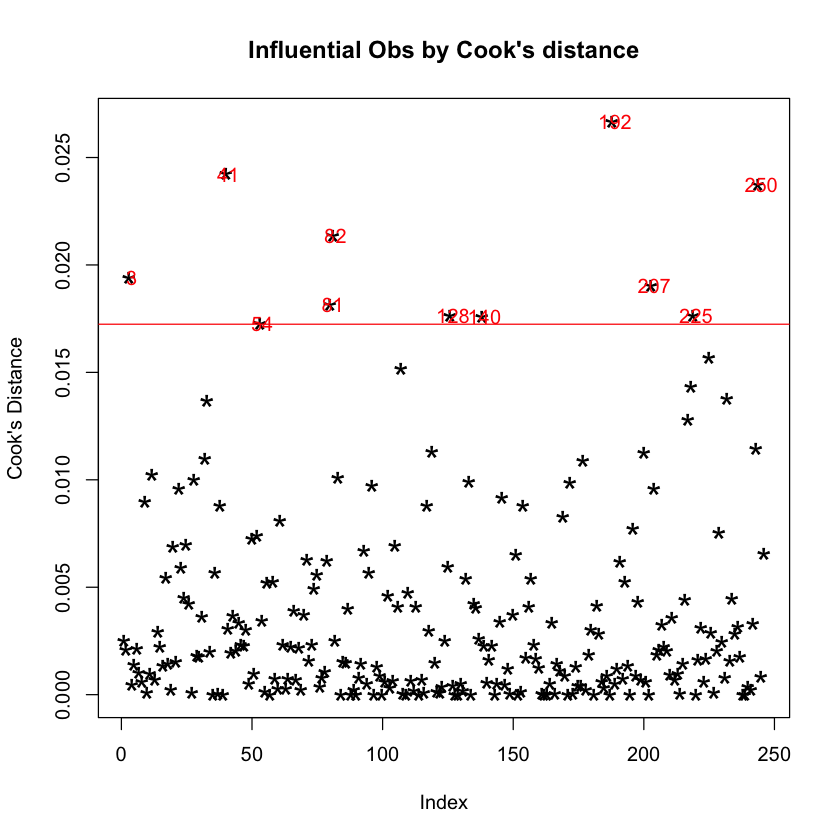

In [17]:
cooksd <- cooks.distance(model_2)
sample_size <- nrow(bodyfat_2)
para_size <- ncol(bodyfat_2)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

### OutlierTest

####To be further, we use outlierTest() to check the model again. And find that 224 maybe an outlier. To prove it, we use dffits to see whether it is true. The result shows that 224 is not an outlier and we don't need to delete it.

In [18]:
library(car)
outlierTest(model_2)

Loading required package: carData


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferonni p
224 -2.558296           0.011161           NA

### DIFFITS

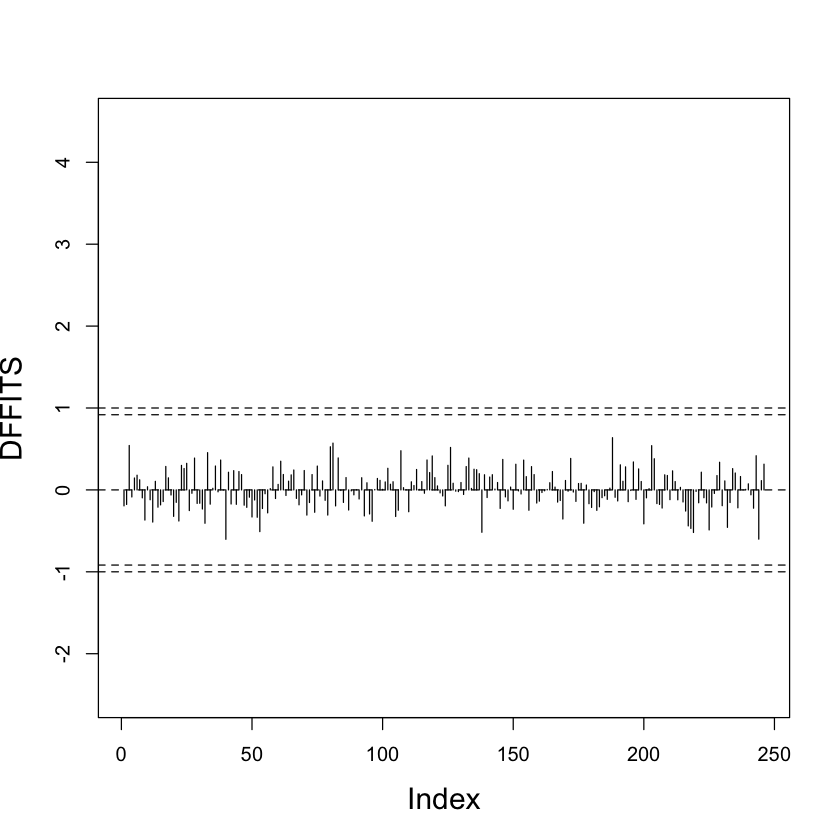

In [19]:
lm.reg.dffits = dffits(model_2)
plot(lm.reg.dffits, type = "h", ylab = "DFFITS", ylim = c(-2.5,4.5),cex.lab=1.5) 
abline(h = c(-1,-2*sqrt(4/19), 0, 2*sqrt(4/19), 1), lty = 2)

# Variable Selection

## Eyeballing

####Just based on the model summary, we can see abdomen, wrist to be important.

In [20]:
summary(model_2)


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6433 -2.7974 -0.1069  2.6348  8.9325 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -53.30060   45.44215  -1.173  0.24203    
AGE           0.05515    0.02990   1.844  0.06642 .  
WEIGHT       -0.17720    0.12721  -1.393  0.16495    
HEIGHT        0.54173    0.61775   0.877  0.38143    
ADIPOSITY     1.01268    0.86902   1.165  0.24509    
NECK         -0.32802    0.21486  -1.527  0.12820    
CHEST        -0.09944    0.10357  -0.960  0.33798    
ABDOMEN       0.83355    0.08523   9.780  < 2e-16 ***
HIP          -0.16396    0.13373  -1.226  0.22143    
THIGH         0.21225    0.13745   1.544  0.12391    
KNEE          0.03994    0.22871   0.175  0.86153    
ANKLE        -0.04475    0.24829  -0.180  0.85712    
BICEPS        0.11376    0.15721   0.724  0.47003    
FOREARM       0.28971    0.19109   1.516  0.13088    
WRIST        -1.40790    0.495

## Mallow’s Cp

####Based on the result of malllow's cp, it seems that Age, Weight, Abdomen, Thigh, Wrist seem to be a good choice.


Attaching package: ‘faraway’

The following objects are masked from ‘package:car’:

    logit, vif



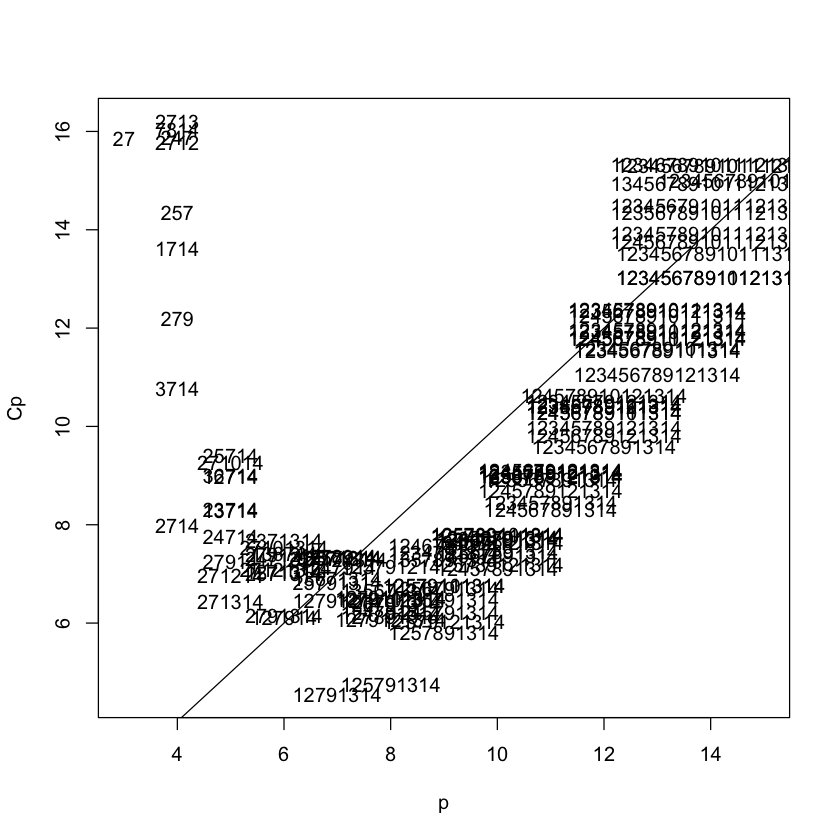

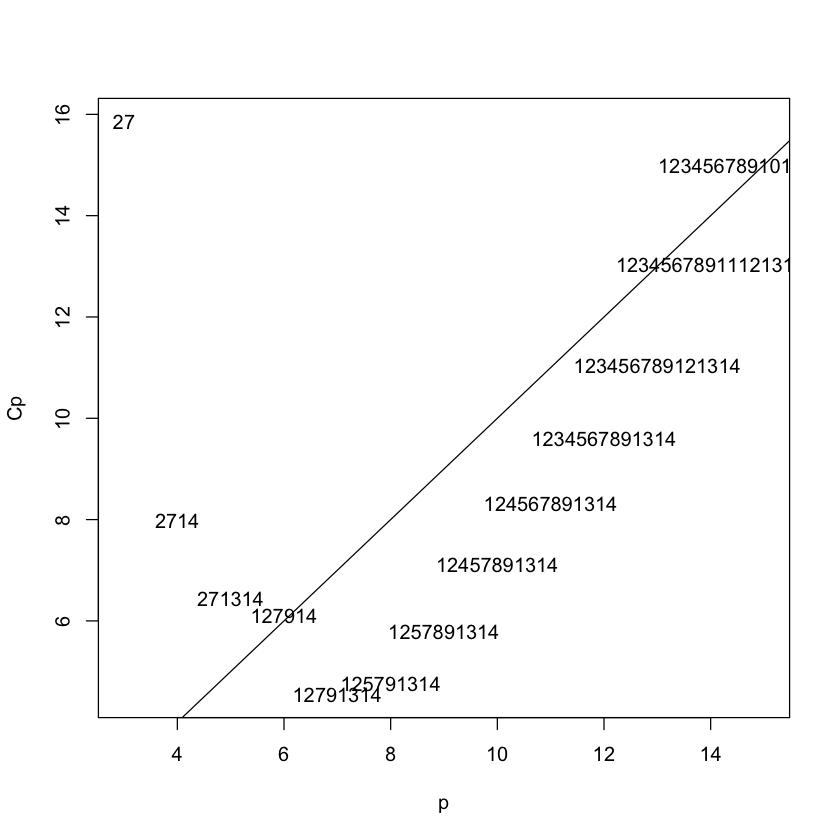

In [21]:
# Mallow’s Cp
X <- model.matrix(model_2)[,-1]
Y <- bodyfat_2[,1]

library(leaps)
library(faraway)

g <- leaps(X,Y)
Cpplot(g)

g <- leaps(X,Y, nbest=1)
Cpplot(g)

In [22]:
# (1,2,7,9,14) seems to be a good choice.
cp.choice <- c(1,2,7,9,14)+1 # column 1 responds to bodyfat.
bodyfat_cp <- bodyfat_2[,c(1,cp.choice)]
head(bodyfat_cp)

BODYFAT,AGE,WEIGHT,ABDOMEN,THIGH,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,154.25,85.2,59.0,17.1
6.9,22,173.25,83.0,58.7,18.2
24.6,22,154.00,87.9,59.6,16.6
10.9,26,184.75,86.4,60.1,18.2
27.8,24,184.25,100.0,63.2,17.7
20.6,24,210.25,94.4,66.0,18.8


## Adjusted R^2

####Based on the adjusted R^2 result, we can see that Age, Weight, Neck, Abdomen, Thigh, Forearm, Wrist seem to be a good choice. 

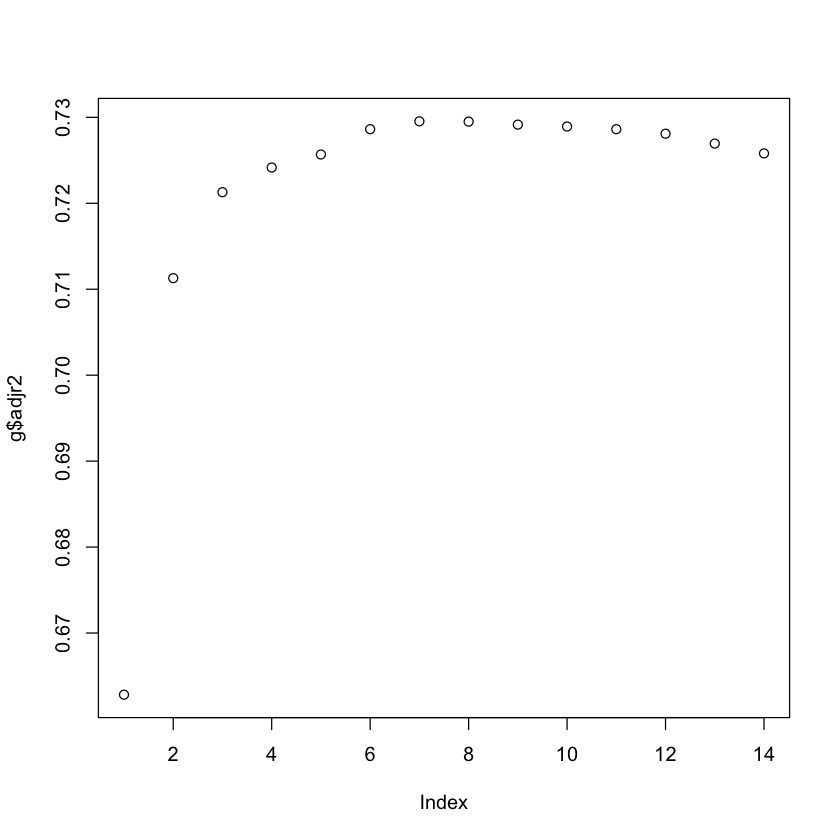

In [23]:
# Adjusted R^2
g <- leaps(X,Y, nbest=1, method="adjr2")
plot(g$adjr2)

In [24]:
r2.choice <- which((g$which)[which(g$adjr2 == max(g$adjr2)),]==T)+1 # column 1 responds to bodyfat.
bodyfat_r2 <- bodyfat_2[,c(1,r2.choice)]
head(bodyfat_r2)

BODYFAT,AGE,WEIGHT,NECK,ABDOMEN,THIGH,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,154.25,36.2,85.2,59.0,27.4,17.1
6.9,22,173.25,38.5,83.0,58.7,28.9,18.2
24.6,22,154.00,34.0,87.9,59.6,25.2,16.6
10.9,26,184.75,37.4,86.4,60.1,29.4,18.2
27.8,24,184.25,34.4,100.0,63.2,27.7,17.7
20.6,24,210.25,39.0,94.4,66.0,30.6,18.8


## AIC and BIC (Forward, Backward, Both)

In [25]:
# AIC backward
library(MASS)
model_AIC_back <- stepAIC(model_2, direction="backward", k = 2)

Warning message:
“package ‘MASS’ was built under R version 3.5.2”

Start:  AIC=681.36
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.46 3474.7 679.39
- ANKLE      1      0.49 3474.8 679.40
- BICEPS     1      7.88 3482.2 679.92
- HEIGHT     1     11.57 3485.8 680.18
- CHEST      1     13.87 3488.1 680.34
- ADIPOSITY  1     20.42 3494.7 680.80
- HIP        1     22.61 3496.9 680.96
<none>                   3474.3 681.36
- WEIGHT     1     29.19 3503.5 681.42
- FOREARM    1     34.57 3508.8 681.80
- NECK       1     35.06 3509.3 681.83
- THIGH      1     35.86 3510.1 681.89
- AGE        1     51.16 3525.4 682.96
- WRIST      1    121.48 3595.8 687.82
- ABDOMEN    1   1438.62 4912.9 764.59

Step:  AIC=679.39
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.32 3475.1 677.42


####The result of AIC backward shows that AGE + WEIGHT + ABDOMEN + THIGH + FOREARM + WRIST to be a good choice.

In [26]:
#BIC backward
model_BIC_back <- stepAIC(model_2, direction="backward", k = log(nrow(bodyfat_2)))

Start:  AIC=733.94
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.46 3474.7 728.47
- ANKLE      1      0.49 3474.8 728.47
- BICEPS     1      7.88 3482.2 728.99
- HEIGHT     1     11.57 3485.8 729.25
- CHEST      1     13.87 3488.1 729.42
- ADIPOSITY  1     20.42 3494.7 729.88
- HIP        1     22.61 3496.9 730.03
- WEIGHT     1     29.19 3503.5 730.49
- FOREARM    1     34.57 3508.8 730.87
- NECK       1     35.06 3509.3 730.91
- THIGH      1     35.86 3510.1 730.96
- AGE        1     51.16 3525.4 732.03
<none>                   3474.3 733.94
- WRIST      1    121.48 3595.8 736.89
- ABDOMEN    1   1438.62 4912.9 813.67

Step:  AIC=728.47
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.32 3475.1 722.99


####The result of BIC backward shows that WEIGHT + ABDOMEN + WRIST to be a good choice.

In [27]:
#AIC forward
model_AIC_for <- stepAIC(model_2, direction="forward", k = 2)

Start:  AIC=681.36
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST



####The result of AIC forward shows that AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST to be a good choice.

In [28]:
#BIC forward
model_BIC_for <- stepAIC(model_2, direction="forward", k = log(nrow(bodyfat_2)))

Start:  AIC=733.94
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST



####The result of BIC forward shows that AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST to be a good choice.

In [29]:
#AIC BOTH
model_AIC_step <- stepAIC(model_2, direction="both", k = 2)

Start:  AIC=681.36
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.46 3474.7 679.39
- ANKLE      1      0.49 3474.8 679.40
- BICEPS     1      7.88 3482.2 679.92
- HEIGHT     1     11.57 3485.8 680.18
- CHEST      1     13.87 3488.1 680.34
- ADIPOSITY  1     20.42 3494.7 680.80
- HIP        1     22.61 3496.9 680.96
<none>                   3474.3 681.36
- WEIGHT     1     29.19 3503.5 681.42
- FOREARM    1     34.57 3508.8 681.80
- NECK       1     35.06 3509.3 681.83
- THIGH      1     35.86 3510.1 681.89
- AGE        1     51.16 3525.4 682.96
- WRIST      1    121.48 3595.8 687.82
- ABDOMEN    1   1438.62 4912.9 764.59

Step:  AIC=679.39
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.32 3475.1 677.42


####The result of AIC both shows that AGE + WEIGHT + ABDOMEN + THIGH + FOREARM + WRIST to be a good choice.

In [30]:
#BIC BOTH
model_BIC_step <- stepAIC(model_2, direction="both", k = log(nrow(bodyfat_2)))

Start:  AIC=733.94
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.46 3474.7 728.47
- ANKLE      1      0.49 3474.8 728.47
- BICEPS     1      7.88 3482.2 728.99
- HEIGHT     1     11.57 3485.8 729.25
- CHEST      1     13.87 3488.1 729.42
- ADIPOSITY  1     20.42 3494.7 729.88
- HIP        1     22.61 3496.9 730.03
- WEIGHT     1     29.19 3503.5 730.49
- FOREARM    1     34.57 3508.8 730.87
- NECK       1     35.06 3509.3 730.91
- THIGH      1     35.86 3510.1 730.96
- AGE        1     51.16 3525.4 732.03
<none>                   3474.3 733.94
- WRIST      1    121.48 3595.8 736.89
- ABDOMEN    1   1438.62 4912.9 813.67

Step:  AIC=728.47
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.32 3475.1 722.99


####The result of BIC both shows that WEIGHT + ABDOMEN + WRIST to be a good choice.

## VIF

####Next, we need to check multicollinearity.
####First, we choose model with 3 variables WEIGHT + ABDOMEN + WRIST to do the correlation plot. It shows that weight and abdomen have strong relationship. 
####Then we calculate the VIF. It seems that the value of weight and abdomen both larger than VIF. So we can remain only one of them in our model.

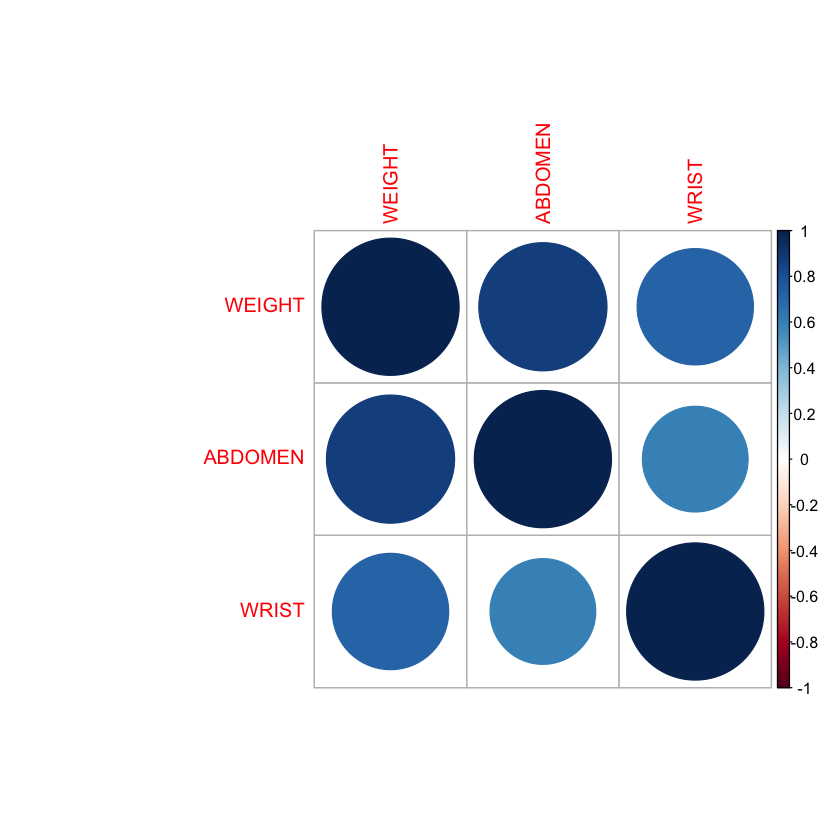

In [31]:
test = bodyfat_2[,c('WEIGHT','ABDOMEN','WRIST')]
corrplot(cor(test), method = "circle")

In [32]:
library(regclass)
model_test_3_variables <- lm(BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data=bodyfat_2)
VIF(model_test_3_variables)
VIF=1/(1-0.7247)
VIF

Loading required package: bestglm
Loading required package: VGAM
Warning message:
“package ‘VGAM’ was built under R version 3.5.2”Loading required package: stats4
Loading required package: splines

Attaching package: ‘VGAM’

The following objects are masked from ‘package:faraway’:

    hormone, logit, pneumo, prplot

The following object is masked from ‘package:car’:

    logit

Loading required package: rpart

Attaching package: ‘rpart’

The following object is masked from ‘package:faraway’:

    solder

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Important regclass change from 1.3:
All functions that had a . in the name now have an _
all.correlations -> all_correlations, cor.demo -> cor_demo, etc.



WEIGHT  ABDOMEN    WRIST 
5.676994 4.237478 2.089447

[1] 3.632401

####To decide which one to be remained, we tried both of them. Then we compare the R^2 of two models, we find that BODYFAT ~ ABDOMEN + WRIST performs much better than the other one.

In [33]:
model_test_2_variables_1 <- lm(BODYFAT ~ ABDOMEN + WRIST, data=bodyfat_2)
summary(model_test_2_variables_1)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.398 -2.953 -0.147  2.916 10.434 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.78130    5.22738  -1.871   0.0625 .  
ABDOMEN      0.71700    0.03211  22.329  < 2e-16 ***
WRIST       -2.06008    0.35140  -5.863 1.48e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.034 on 243 degrees of freedom
Multiple R-squared:  0.7058,	Adjusted R-squared:  0.7034 
F-statistic: 291.5 on 2 and 243 DF,  p-value: < 2.2e-16


In [34]:
model_test_2_variables_2 <- lm(BODYFAT ~ WEIGHT + WRIST, data=bodyfat_2)
summary(model_test_2_variables_2)


Call:
lm(formula = BODYFAT ~ WEIGHT + WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.953  -4.006  -0.018   4.051  15.952 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.39877    8.48446   1.815  0.07077 .  
WEIGHT       0.21445    0.02003  10.705  < 2e-16 ***
WRIST       -1.90883    0.58571  -3.259  0.00128 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.808 on 243 degrees of freedom
Multiple R-squared:  0.3899,	Adjusted R-squared:  0.3849 
F-statistic: 77.66 on 2 and 243 DF,  p-value: < 2.2e-16


####After that, we can check the new model's multicollinearity again. It shows that there is no multicollinearity any more.

In [35]:
VIF(model_test_2_variables_1)
1/(1-0.7058)

ABDOMEN    WRIST 
1.544314 1.544314

[1] 3.399048

# Model Construction & Evaluation

####In this part, we use 2 methods to evaluate each model with different choice of variables: R^2 and MSE

## R^2

In [36]:
#All variables
summary(model_2)


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6433 -2.7974 -0.1069  2.6348  8.9325 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -53.30060   45.44215  -1.173  0.24203    
AGE           0.05515    0.02990   1.844  0.06642 .  
WEIGHT       -0.17720    0.12721  -1.393  0.16495    
HEIGHT        0.54173    0.61775   0.877  0.38143    
ADIPOSITY     1.01268    0.86902   1.165  0.24509    
NECK         -0.32802    0.21486  -1.527  0.12820    
CHEST        -0.09944    0.10357  -0.960  0.33798    
ABDOMEN       0.83355    0.08523   9.780  < 2e-16 ***
HIP          -0.16396    0.13373  -1.226  0.22143    
THIGH         0.21225    0.13745   1.544  0.12391    
KNEE          0.03994    0.22871   0.175  0.86153    
ANKLE        -0.04475    0.24829  -0.180  0.85712    
BICEPS        0.11376    0.15721   0.724  0.47003    
FOREARM       0.28971    0.19109   1.516  0.13088    
WRIST        -1.40790    0.495

In [37]:
#Mallow's Cp
summary(model_cp <- lm(BODYFAT ~ ., data=bodyfat_cp))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_cp)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6933 -2.7112 -0.2906  2.7531  9.1585 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.42857    7.71809  -3.813 0.000175 ***
AGE           0.05002    0.02823   1.772 0.077660 .  
WEIGHT       -0.10075    0.03106  -3.243 0.001349 ** 
ABDOMEN       0.81516    0.06560  12.425  < 2e-16 ***
THIGH         0.23494    0.10639   2.208 0.028176 *  
WRIST        -1.38073    0.44208  -3.123 0.002008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.879 on 240 degrees of freedom
Multiple R-squared:  0.7313,	Adjusted R-squared:  0.7257 
F-statistic: 130.6 on 5 and 240 DF,  p-value: < 2.2e-16


In [38]:
#Adjusted R^2
summary(model_r2 <- lm(BODYFAT ~ ., data=bodyfat_r2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_r2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8691 -2.8257 -0.1961  2.5702  9.0615 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.52080    8.34094  -3.659 0.000312 ***
AGE           0.05734    0.02822   2.032 0.043305 *  
WEIGHT       -0.10600    0.03269  -3.243 0.001352 ** 
NECK         -0.27031    0.20102  -1.345 0.180005    
ABDOMEN       0.83161    0.06553  12.690  < 2e-16 ***
THIGH         0.22737    0.10575   2.150 0.032565 *  
FOREARM       0.38276    0.17763   2.155 0.032183 *  
WRIST        -1.38552    0.46579  -2.975 0.003236 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.852 on 238 degrees of freedom
Multiple R-squared:  0.7373,	Adjusted R-squared:  0.7295 
F-statistic: 95.41 on 7 and 238 DF,  p-value: < 2.2e-16


In [39]:
#AIC backward
summary(model_AIC_back)


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + ABDOMEN + THIGH + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8040 -2.6964 -0.2462  2.7033  8.5195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33.73394    8.00485  -4.214 3.56e-05 ***
AGE           0.05378    0.02815   1.911 0.057213 .  
WEIGHT       -0.11586    0.03191  -3.631 0.000345 ***
ABDOMEN       0.82714    0.06556  12.617  < 2e-16 ***
THIGH         0.22594    0.10593   2.133 0.033941 *  
FOREARM       0.32899    0.17336   1.898 0.058946 .  
WRIST        -1.55494    0.44919  -3.462 0.000636 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.858 on 239 degrees of freedom
Multiple R-squared:  0.7353,	Adjusted R-squared:  0.7286 
F-statistic: 110.6 on 6 and 239 DF,  p-value: < 2.2e-16


In [40]:
#BIC backward
summary(model_BIC_back)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1586 -2.8877 -0.2833  2.9141  9.1558 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.02915    6.15638  -3.903 0.000123 ***
WEIGHT       -0.09102    0.02234  -4.075 6.24e-05 ***
ABDOMEN       0.88451    0.05156  17.155  < 2e-16 ***
WRIST        -1.23538    0.39621  -3.118 0.002042 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.91 on 242 degrees of freedom
Multiple R-squared:  0.7247,	Adjusted R-squared:  0.7213 
F-statistic: 212.4 on 3 and 242 DF,  p-value: < 2.2e-16


In [41]:
#BIC backward + VIF
summary(model_test_2_variables_1)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.398 -2.953 -0.147  2.916 10.434 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.78130    5.22738  -1.871   0.0625 .  
ABDOMEN      0.71700    0.03211  22.329  < 2e-16 ***
WRIST       -2.06008    0.35140  -5.863 1.48e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.034 on 243 degrees of freedom
Multiple R-squared:  0.7058,	Adjusted R-squared:  0.7034 
F-statistic: 291.5 on 2 and 243 DF,  p-value: < 2.2e-16


####Based on the above models, we need to trade off the R^2 and number of variables in the model.
####We can see the the model with 2 variables ABDOMEN and WRIST, its R^2 is 0.7058, not much smaller than the model with all variables, but on the other hand it just needs 2 variables, and costs much less than other models. ####In this way, we choose ABDOMEN and WRIST to be model variables and construct our model.

## MSE

In [42]:
library(caret)

Warning message:
“package ‘caret’ was built under R version 3.5.2”Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:regclass’:

    qq

The following object is masked from ‘package:faraway’:

    melanoma

Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin


Attaching package: ‘caret’

The following object is masked from ‘package:VGAM’:

    predictors



In [43]:
bodyfat_raw <- read.csv("BodyFat.csv")
bodyfat <- bodyfat_raw[,-c(1,3)]
#rule out of outliers
d1 = 42
d1_height = sqrt(bodyfat[d1,'WEIGHT']*703/(bodyfat[d1,'ADIPOSITY']))
bodyfat[d1,'HEIGHT'] =  d1_height
outliers <- c(182,216,172,39,86,221) 
bodyfat <- bodyfat[-outliers, ]

In [44]:
#All variables
accs <- rep(0,3)

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)

  train <- bodyfat[-indices,]
  test <- bodyfat[indices,]
  
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_all=mean(accs))

[1] 17.48268

In [45]:
#PCA
accs <- rep(0,3)

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
    #(((i-1) * round((1/3)*nrow(bodyfat))) + 1):((i*round((1/3) * nrow(bodyfat))))
  
  train <- bodyfat[indices,]
  test <- bodyfat[-indices,]
  
  model <- prcomp(train[,-1])
  train$PC1=as.numeric(predict(model,train[,-1])[,1])
  train$PC2=as.numeric(predict(model,train[,-1])[,2])
  train$PC3=as.numeric(predict(model,train[,-1])[,3])
  m1=lm(BODYFAT~PC1+PC2+PC3,data=train)
  cov=as.data.frame(predict(model,test[,-1])[,1:3])
  new=data.frame(PC1=cov$PC1,PC2=cov$PC2,PC3=cov$PC3)
  pred_y=predict(m1,newdata = new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_pca=mean(accs))

[1] 20.26021

In [46]:
#mMallow's Cp
accs <- rep(0,3)
cp.choice <- c(2,7,13,14)+1
bodyfat_cp <- bodyfat[,c(1,cp.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)

  train <- bodyfat_cp[indices,]
  test <- bodyfat_cp[-indices,]
  
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_cp=mean(accs))

[1] 16.88053

In [47]:
#Adjusted R^2
accs <- rep(0,3)
r2.choice <- c(2,3,6,8,9,10,14,15)
bodyfat_r2 <-bodyfat[,c(1,r2.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_r2[indices,]
  test <- bodyfat_r2[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_r2=mean(accs))

[1] 16.41072

In [48]:
#AIC back
accs <- rep(0,3)
aic.back.choice <- c(2,3,8,10,14,15)
bodyfat_aic.back <-bodyfat[,c(1,aic.back.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_aic.back[indices,]
  test <- bodyfat_aic.back[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_aic.back=mean(accs))

[1] 16.69233

In [49]:
#BIC back
accs <- rep(0,3)
bic.back.choice <- c(3,8,15)
bodyfat_bic.back <-bodyfat[,c(1,bic.back.choice)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_bic.back[indices,]
  test <- bodyfat_bic.back[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_bic.back=mean(accs))

[1] 17.24045

In [50]:
#One variable Weight
accs <- rep(0,3)
weight <- c(3)
bodyfat_weight <-bodyfat[,c(1,weight)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_weight[indices,]
  test <- bodyfat_weight[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  new=data.frame(WEIGHT=test[,-1])
  pred_y=predict.lm(model, new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_weight=mean(accs))

[1] 39.82781

In [51]:
#One variable Height
accs <- rep(0,3)
height <- c(4)
bodyfat_height <-bodyfat[,c(1,height)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_height[indices,]
  test <- bodyfat_height[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  new=data.frame(HEIGHT=test[,-1])
  pred_y=predict.lm(model, new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_height=mean(accs))

[1] 58.80477

In [52]:
#One variable Abdomen
accs <- rep(0,3)
abdomen <- c(8)
bodyfat_abdomen <-bodyfat[,c(1,abdomen)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_abdomen[indices,]
  test <- bodyfat_abdomen[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  new=data.frame(ABDOMEN=test[,-1])
  pred_y=predict.lm(model, new)
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_abdomen=mean(accs))

[1] 20.56314

In [54]:
#Two varibales Abdomen+Wrist
accs <- rep(0,3)
abdomen_wrist <- c(8,15)
bodyfat_abdomen_wrist <-bodyfat[,c(1,abdomen_wrist)]

for (i in 1:3) {
  set.seed(2019)
  indices <- sample.int(n = nrow(bodyfat), size = floor(2/3*nrow(bodyfat)), replace = F)
  train <- bodyfat_abdomen_wrist[indices,]
  test <- bodyfat_abdomen_wrist[-indices,]
  model <- lm(BODYFAT ~ ., data = train)
  
  # Make a prediction on the test set using tree
  pred_y=predict(model, test[,-1])
  
  pred_y=pred_y[!is.na(pred_y)]
  test_BODYFAT=test$BODYFAT[!is.na(test$BODYFAT)]
  
  accs[i] <- mean((pred_y-test_BODYFAT)^2)
}

(acc_abdomen_wrist=mean(accs))

[1] 18.53132

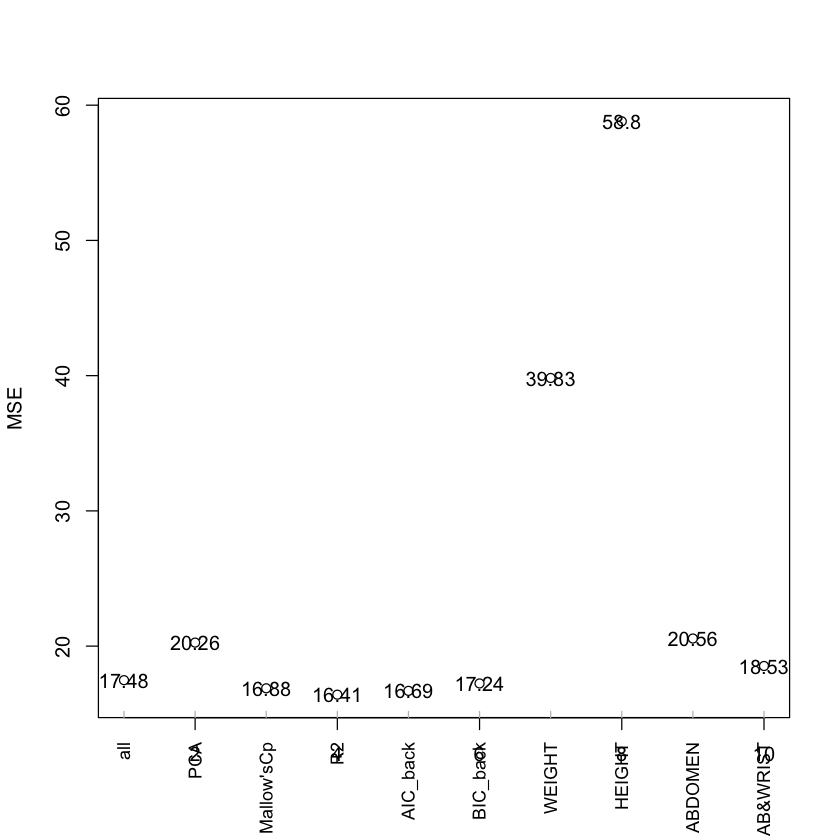

In [55]:
plot(c(acc_all,acc_pca,acc_cp,acc_r2,acc_aic.back,acc_bic.back,acc_weight,acc_height,acc_abdomen,acc_abdomen_wrist),xlab="",ylab="MSE")
axis(1, at=1:10, labels=c("all","PCA","Mallow'sCp","R2","AIC_back","BIC_back","WEIGHT","HEIGHT","ABDOMEN","AB&WRIST"), tck=.01, cex.axis=0.9, srt=45, col.ticks = "grey", las=2)
text(x=1:10,y=c(acc_all,acc_pca,acc_cp,acc_r2,acc_aic.back,acc_bic.back,acc_weight,acc_height,acc_abdomen,acc_abdomen_wrist),
    labels=as.character(round(c(acc_all,acc_pca,acc_cp,acc_r2,acc_aic.back,acc_bic.back,acc_weight,acc_height,acc_abdomen,acc_abdomen_wrist),2)))

####We can conclude from the above plot that MSE of 2 variables model is 18.53%, not much larger than that of 3 variables model. So still trade off between cost and accuracy, we decide to choose the 2 variable model:BODYFAT ~ ABDOMEN + WRIST.
####Our final model looks like the following:BODYFAT = 0.717*ABDOMEN - 2.06008*WRIST

In [56]:
summary(model_test_2_variables_1)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
   Min     1Q Median     3Q    Max 
-9.398 -2.953 -0.147  2.916 10.434 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.78130    5.22738  -1.871   0.0625 .  
ABDOMEN      0.71700    0.03211  22.329  < 2e-16 ***
WRIST       -2.06008    0.35140  -5.863 1.48e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.034 on 243 degrees of freedom
Multiple R-squared:  0.7058,	Adjusted R-squared:  0.7034 
F-statistic: 291.5 on 2 and 243 DF,  p-value: < 2.2e-16


# Model Diagnosis

# Application